### Avacado Project

##### Problem Statement:
''' Avocado is a fruit consumed by people heavily in the United States.''' 

Content
* This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 
* The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 
* Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

* Date - The date of the observation
* AveragePrice - the average price of a single avocado
* type - conventional or organic
* year - the year
* Region - the city or region of the observation
* Total Volume - Total number of avocados sold
* 4046 - Total number of avocados with PLU 4046 sold
* 4225 - Total number of avocados with PLU 4225 sold
* 4770 - Total number of avocados with PLU 4770 sold

### Importing the Necessary Libraries
* Its always better to import all the libraries at one go and it becomes easier.

In [399]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,roc_auc_score,roc_curve,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split,GridSearchCV 
import joblib
from sklearn.decomposition import PCA
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

### Loading the Dataset into variable:

In [355]:
df = pd.read_csv('Avacado.csv')
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


I am loading the dataset into variable i.e.'df' and processing the first 5 rows. As in this data set most of the columns are float in nature.

# EDA

In [356]:
# lets drop the Unnamed: 0 column because it just kind of id which has no effect on dataset 
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [357]:
#Checking the total rows and total columns
df.shape

(16468, 13)

In [358]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [359]:
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year            float64
region           object
dtype: object

* As seen in data set there was one index column which does not paly any importance role for prediction in the price of avocado, so I had dropped that column.

* Also, I checked for the shape of the dataset as there are 16468 rows and 13 columns after deleting the index column.

* Also, most of the columns are of same data type that is float, Date, type and region are of object data type.

<AxesSubplot:>

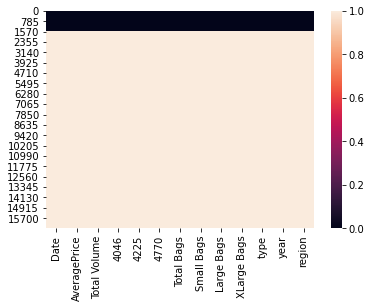

In [360]:
#checking null values using heatmap
sns.heatmap(df.isnull())

* As we can see there are lots of missing values in all the columns, I will drop all the null values here as all the missing values in rows are equal in all the columns

In [361]:
df = df.dropna()
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [362]:
df.shape

(1517, 13)

* After dropping null values we have arrived at 1517 as total rows and 13 columns

In [363]:
#check the mean of price at each year of types of avacado
df.groupby('year')['AveragePrice'].mean()

year
2015.0    1.060110
2016.0    1.151498
Name: AveragePrice, dtype: float64

* In above, I am finding that year 2016 is aggressive year where avacado price is higher as compared to other 2015.

In [364]:
# check how much type of avacado is sold in last 2 years.
df.groupby('year')['type'].value_counts()

year    type        
2015.0  conventional    1270
2016.0  conventional     247
Name: type, dtype: int64

* In the above, we can find only one type of avacado which is highly sold in the year 2015.

In [365]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


* Above statistics data show that there are multiple outliers mostly in XLarge Bags. Also, we can see the difference between mean and 50% value in most of the columns which needs to be fixed for better prediction.

# Data Visualization

* Here we try to visualize the data using difference columns and understand the dataset even better.

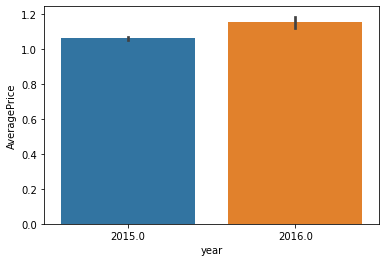

In [366]:
#Checking ratio of year and price that which year had max average price
sns.barplot(x='year',y='AveragePrice',data=df)
plt.show()

* As expected 2016 year is when we had max average price.

# Plotting Histogram

* A histogram shows the frequency on the vertical axis and horizontal axis is another dimension. Usually it has bins, where every bin has a minimum and maximum value. Each bin also has a frequncy between x and infinite.

* So in this we can also check the skewness of the features.

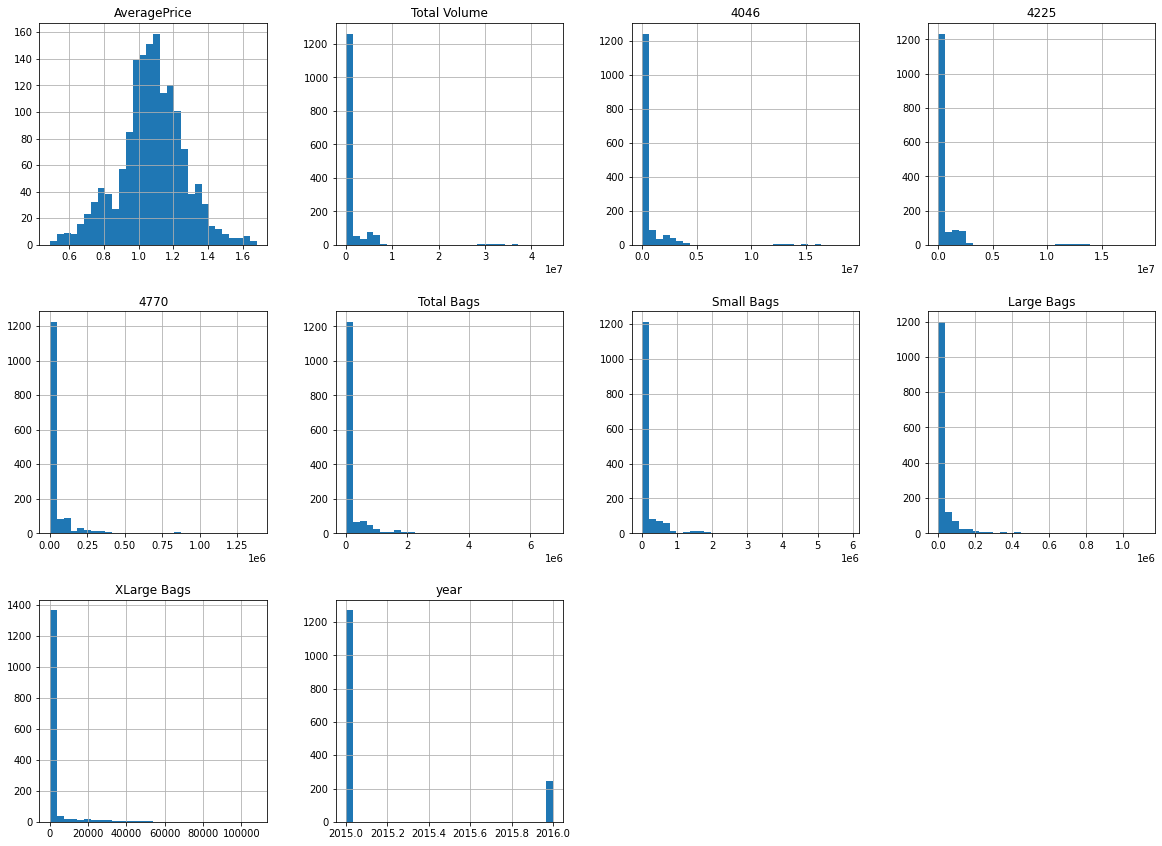

In [367]:
df.hist(figsize=(20,20), grid=True, layout=(4,4), bins = 30)
plt.show()

###### As we can see

* Average price column is normally distributed
* Rest of the date are not much varying in terms of numbers, so they are almost right skewed.
* To make the columns as normal distributed we can use different mothods, here I am using numpy lot to make the skew values norma.

In [368]:
df.skew()

AveragePrice   -0.109444
Total Volume    6.200138
4046            6.051830
4225            6.394926
4770            5.405164
Total Bags      5.366378
Small Bags      5.355185
Large Bags      5.144495
XLarge Bags     5.775077
year            1.828332
dtype: float64

In [369]:
# make the skew less than or equal to 0.5 for better prediction and plotting normal distribution
skew=('Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags')
for col in skew:
    if df.skew().loc[col]>0.55:
        df[col] = np.log1p(df[col])

Intially we calculated the skew value and we found that value are far from 0
* It's always good to have skew value near to zero, so I used 'log1p' method to make the skew value near to zero.
* Now the skew value for the features are near to zero.

# Label Encoding:

* Converting Region and type into numeric value. Also we dropping date columns as is has no impact on the dataset.  

In [370]:
df.drop('Date',axis=1, inplace=True)

In [371]:
enc=LabelEncoder()
df['type'] = enc.fit_transform(df['type'])

In [372]:
df['region'] = enc.fit_transform(df['region'])

In [373]:
df.dtypes

AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type              int32
year            float64
region            int32
dtype: object

# Outliers

* An Outlier is data point in a data set that is distant from all other observations. A data point that lies outside the overall distribution of the dataset.

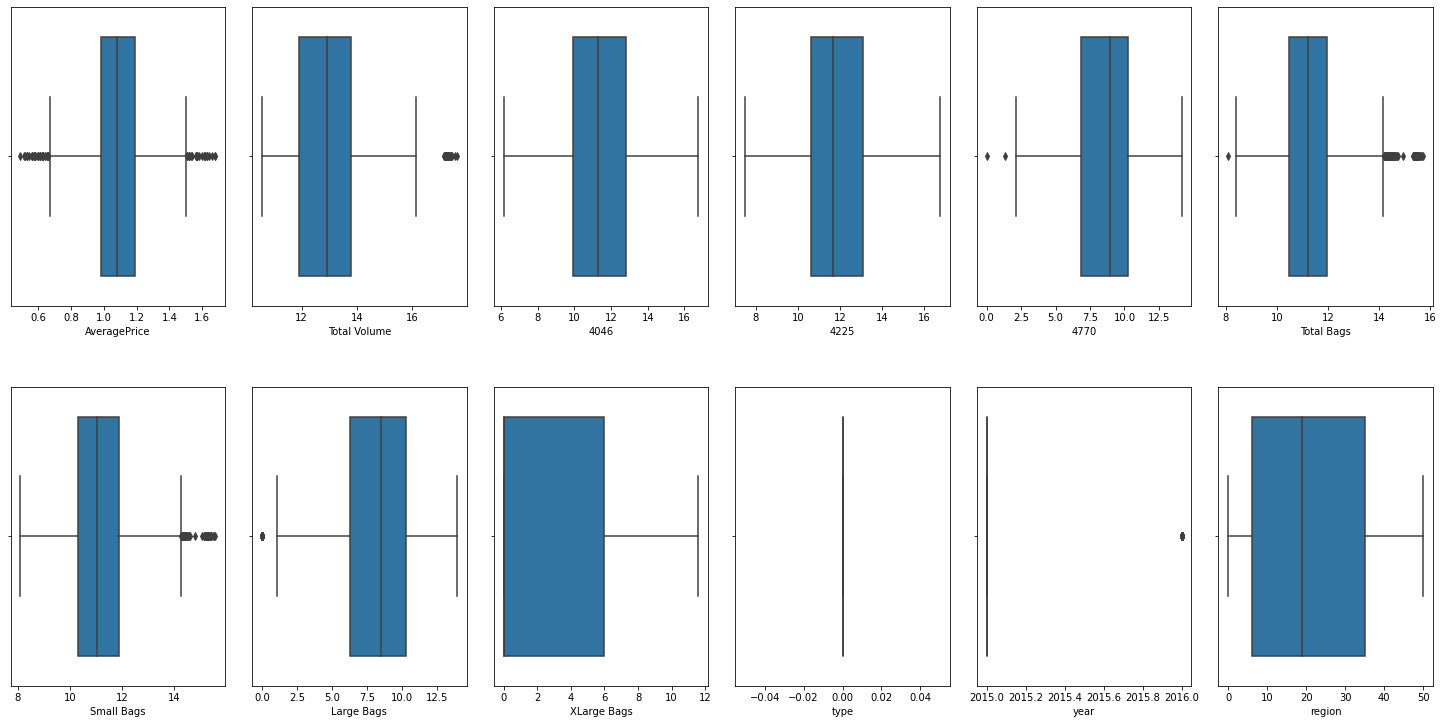

In [374]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    if col != ' types':
        sns.boxplot(value, ax=ax[index])
        index+= 1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)

From the above image we can clearly see that there are number of number of black dots in most of the column which are referring to outlier, most of the data are outside the distribution.

In [375]:
print(df['Total Volume'].quantile(0.98))

15.808676741375358


In [376]:
df['Total Volume'] = np.where(df['Total Volume'] >15.808676741375358,15.808676741375358,df['Total Volume'])
print(df['Total Volume'].skew())

0.4508443892548505


In [377]:
print(df['Total Bags'].quantile(.99))

15.440464938177191


In [378]:
df['Total Bags'] = np.where(df['Total Bags'] >14.079848767236143,14.079848767236143,df['Total Bags'])
print(df['Total Bags'].skew())

0.4116678205163397


# Correlation Matrix:

Its basically a covariance matrix. A summary measure called the correlation describe the strength of the linear association. Correllation summarizes the strength and direction of the linear line association between two quantitative variable.

Now I am finding the correllation value of each column, this value is categorized into mainly 2 parts that are:
    - Positive correlated value
    - Negative correlated value

The most the value is positive means that column in much corelated and vice versa.

In [435]:
df_cor['AveragePrice'].sort_values(ascending=False)

AveragePrice    1.000000
year            0.178683
XLarge Bags    -0.064988
4225           -0.129466
Small Bags     -0.149251
Total Bags     -0.190164
Large Bags     -0.214802
region         -0.229408
4770           -0.289056
Total Volume   -0.335001
4046           -0.511040
Name: AveragePrice, dtype: float64

Here we notice that we dont have other type except Conventional. hence, we can remove this column as it has not importance here.

In [380]:
df.drop('type',axis=1,inplace=True)

[]

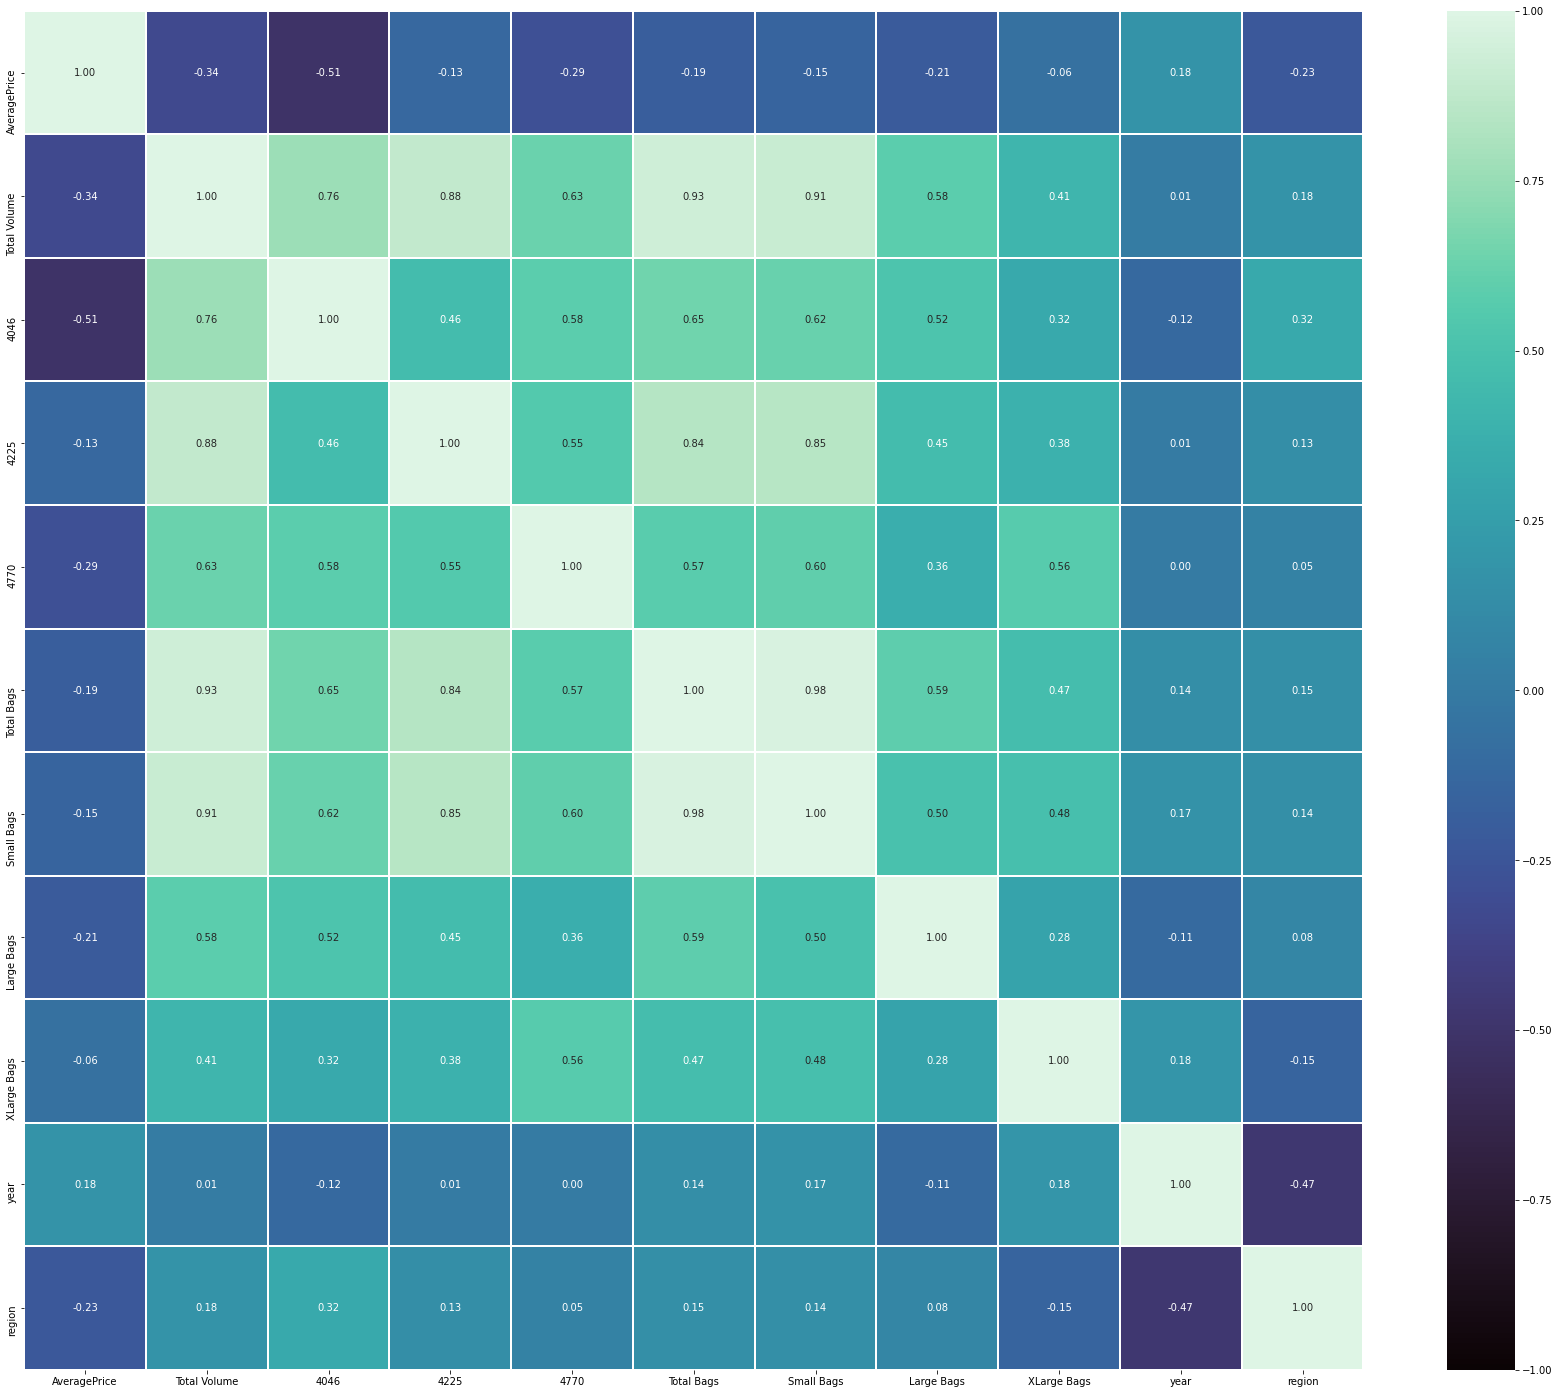

In [392]:
#checking the co-relation of all column to each other
df_cor = df.corr()
plt.figure(figsize=(30,25))
sns.heatmap(df_cor,annot=True,linewidth=0.1,linecolor='white',fmt='0.2f',vmin=-1,cmap='mako')
plt.plot()

# Drop and Standard Scaler:

Heare I am making two variable x and y where x is having all column except Average Price and y is having only Rings column.
* applying Standard scaling method on x variables.

In [382]:
x = df.drop('AveragePrice',axis=1)
y = df['AveragePrice']

In [393]:
# StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

# Prediction with Average price

In [397]:
model = [DecisionTreeRegressor(),KNeighborsRegressor(),AdaBoostRegressor(),LinearRegression(),GradientBoostingRegressor()]

In [401]:
max_r2_score = 0
for r_state in range(40,90):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=r_state)
    for i in model:
        i.fit(x_train,y_train)
        pred = i.predict(x_test)
        r2_sc = r2_score(y_test,pred)
        print('R2 score correspon to random state',r_state, 'is', r2_sc)
        if r2_sc>max_r2_score:
            max_r2_score=r2_sc
            final_state=r_state
            final_model=i

print()
print()
print()
print()
print('max R2 score correspond to random staate', final_state, 'is', max_r2_score,'and model is',final_model)

R2 score correspon to random state 40 is 0.6216379137054658
R2 score correspon to random state 40 is 0.7560582822417163
R2 score correspon to random state 40 is 0.5727559967189122
R2 score correspon to random state 40 is 0.37704657199539715
R2 score correspon to random state 40 is 0.7412217913170138
R2 score correspon to random state 41 is 0.6555274183009094
R2 score correspon to random state 41 is 0.7883205171125213
R2 score correspon to random state 41 is 0.584446741960933
R2 score correspon to random state 41 is 0.38646773895890707
R2 score correspon to random state 41 is 0.7485728501872735
R2 score correspon to random state 42 is 0.6266825299346416
R2 score correspon to random state 42 is 0.7632757162742307
R2 score correspon to random state 42 is 0.5965754701101602
R2 score correspon to random state 42 is 0.3669065911502003
R2 score correspon to random state 42 is 0.7426243526018623
R2 score correspon to random state 43 is 0.6449230276282925
R2 score correspon to random state 43 i

R2 score correspon to random state 67 is 0.7184153846778023
R2 score correspon to random state 68 is 0.6664351677163243
R2 score correspon to random state 68 is 0.7810248882777837
R2 score correspon to random state 68 is 0.6337423882795776
R2 score correspon to random state 68 is 0.4018710641627754
R2 score correspon to random state 68 is 0.7770636525590386
R2 score correspon to random state 69 is 0.619115620583256
R2 score correspon to random state 69 is 0.7160175877943054
R2 score correspon to random state 69 is 0.5559025977680248
R2 score correspon to random state 69 is 0.3596399127093033
R2 score correspon to random state 69 is 0.7113914154312377
R2 score correspon to random state 70 is 0.6351606540228849
R2 score correspon to random state 70 is 0.7441635338345864
R2 score correspon to random state 70 is 0.5708858706154211
R2 score correspon to random state 70 is 0.34296453716479447
R2 score correspon to random state 70 is 0.7192719135768856
R2 score correspon to random state 71 is

Above I have looped the variables which helped me to provide R2 score at each random state and for the best state wher R2 score is maximum is coming as output

In [418]:
#Checking the best parameter for prediction of KNeighborRegressor also using GridSearchCV
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=75)
KNN=KNeighborsRegressor()
parameter = {'n_neighbors':range(1,30)}
gridsearch=GridSearchCV(KN,parameter)
gridsearch.fit(x_train,y_train)
gridsearch.best_params_

{'n_neighbors': 2}

In [406]:
KNN = KNeighborsRegressor(n_neighbors=2)
KNN.fit(x_train,y_train)
pred = KNN.predict(x_test)
r2_sc = r2_score(y_test,pred)
print('R2 score:',r2_sc*100)

R2 score: 83.60974854796494


In [409]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
print('Mean Absolute Error:',mean_absolute_error(y_test,pred))
print('Mean Squared Error:',mean_squared_error(y_test,pred))
print('Root Mean Absolute Error:',np.sqrt(mean_absolute_error(y_test,pred)))

Mean Absolute Error: 0.05890219560878243
Mean Squared Error: 0.006100998003992015
Root Mean Absolute Error: 0.2426977453722684


Text(0, 0.5, 'Predicted_y')

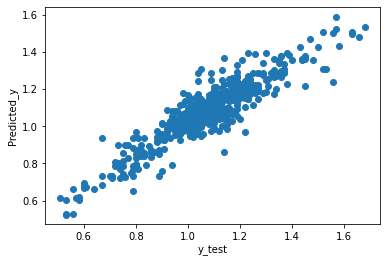

In [410]:
#Checking the diff between actual and predicted value using graph
plt.scatter(x=y_test,y=pred)
plt.xlabel('y_test')
plt.ylabel('Predicted_y')

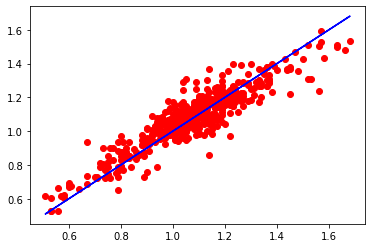

In [411]:
plt.scatter(x=y_test,y=pred, color='r')
plt.plot(y_test,y_test,color='b')

# Prediction

* Since the target variable is contineous in nature, I have used regression technique
* While calculating the best random state 75 is the best state which providing the highest R2 score value for this model.
* After using the GridSearchCV, I could find the best param and then used the same for that model.
* Post using the best param I found the best R2 score i.e. 83.60% with the model KNeighborRegressor.
* Also, plotted the graph and we can see that the actual value and predicted value are very close to each other, so the line is best fit line.

# Observations

* I had used LabelEncoder to make the categorical data into numeric data.
* R2 score value value is greater than the accuracy score.
* There were minimal outliers after preprocessing the data.

# Saving the model

In [436]:
import pickle
filename = 'Avacado.pkl'
pickle.dump(KNN,open(filename,'wb'))